# Goal Module

In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.ioff()
from IPython.display import HTML

In [2]:
import mantrap
import numpy as np
import torch

env = mantrap.environment.PotentialFieldEnvironment(ego_type=mantrap.agents.DoubleIntegratorDTAgent, 
                                                    ego_position=torch.tensor([-5, 0]), 
                                                    ego_velocity=torch.ones(2))

### Goal Norm Module

In [22]:
modules = [mantrap.modules.GoalNormModule]

solver = mantrap.solver.SGradSolver(env, goal=torch.tensor([5, 0]),t_planning=5, modules=modules, is_logging=True)
solver.solve(time_steps=10)

goal_norm_opt = solver.log_query("goal_norm", key_type=mantrap.constants.LT_OBJECTIVE, iteration="end")
print(f"Optimal value => {min(goal_norm_opt)}")
goal_norm = solver.log_query("goal_norm", key_type=mantrap.constants.LT_OBJECTIVE, iteration=0, as_dict=True)
goal_norm = {key: values / values[-1] for key, values in goal_norm.items()}

HTML(solver.visualize_scenes(legend=True))

Optimal value => 0.5569198131561279


### Goal Sum Module 

In [23]:
modules = [mantrap.modules.baselines.GoalSumModule]

solver = mantrap.solver.SGradSolver(env, goal=torch.tensor([5, 0]), t_planning=5, modules=modules, is_logging=True)
solver.solve(time_steps=10)

goal_sum_opt =  solver.log_query("goal_sum", key_type=mantrap.constants.LT_OBJECTIVE, iteration="end")
print(f"Optimal value => {min(goal_sum_opt)}")
goal_sum = solver.log_query("goal_sum", key_type=mantrap.constants.LT_OBJECTIVE, iteration=0, as_dict=True)
goal_sum = {key: values / values[-1] for key, values in goal_sum.items()}

HTML(solver.visualize_scenes())

Optimal value => 1.3439387083053589


### Comparison 

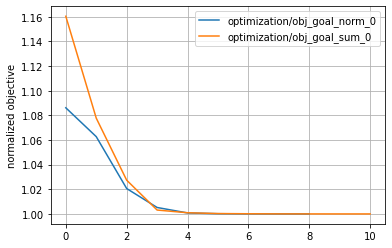

In [24]:
comparison_dict = {**goal_norm, **goal_sum}

plt.close('all')
for key, values in comparison_dict.items():
    plt.plot(values, label=key)
plt.ylabel("normalized objective")
plt.legend()
plt.grid()
plt.show()